# NLP - Emotion Classification in Text

## Objective: 
*  Develop machine learning models to classify emotions in text samples

## Importing Libraries

In [1]:
# libraries for EDA and visualization
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.copy_on_write = True

# 1. Loading and Preprocessing

In [3]:
# loading dataset
data = pd.read_csv(r"C:/Users/LENOVO/Downloads/nlp_dataset.csv")
data

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [4]:
data.shape

(5937, 2)

In [5]:
data.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [5]:
data.tail()

,Comment,Emotion
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear
5936,i just wanted to apologize to you because i fe...,anger


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


##### * Total 5937 entries no null values found

In [7]:
# missing values
data.isnull().sum()

Comment    0
Emotion    0
dtype: int64

##### * No missing values are here.

In [8]:
data.nunique()

Comment    5934
Emotion       3
dtype: int64

##### * We found 3 categories of emotions ['fear' 'anger' 'joy']
##### * 5934 unique values in Comment so we found the possibility of duplicate comments

In [9]:
# Check duplicated comments
data[data['Comment'].duplicated(keep=False)]

,Comment,Emotion
986,i resorted to yesterday the post peak day of i...,anger
1930,i resorted to yesterday the post peak day of i...,fear
2262,i feel like a tortured artist when i talk to her,anger
2877,i feel pretty tortured because i work a job an...,anger
4869,i feel pretty tortured because i work a job an...,fear
5870,i feel like a tortured artist when i talk to her,fear


##### * We found duplicated comments with incorrect emotions at index 1930, 4869, 5870 so we are going to drop those rows

In [10]:
data = data.drop_duplicates(subset='Comment')
print(f"Shape after removing duplicates: {data.shape}")

Shape after removing duplicates: (5934, 2)


In [11]:
# Reset index after removing duplicates
data.reset_index(drop=True, inplace=True)

In [12]:
# the counts of unique emotions
emotion_counts = data['Emotion'].value_counts()
emotion_counts

Emotion
anger    2000
joy      2000
fear     1934
Name: count, dtype: int64

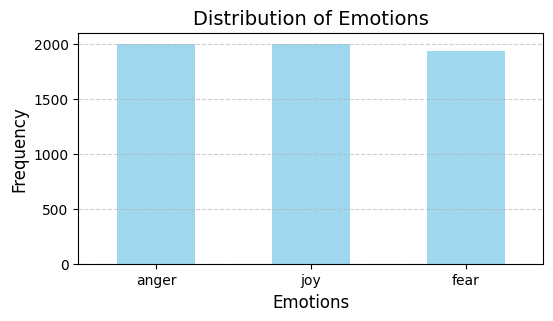

In [14]:
import matplotlib.pyplot as plt
# Plot the bar chart
plt.figure(figsize=(6, 3))
emotion_counts.plot(kind='bar', color=["skyblue"], alpha=0.8)
plt.title("Distribution of Emotions", fontsize=14)
plt.xlabel("Emotions", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Data Preprocessing

## Text Cleaning: 

### Punctuation Removal:

In [15]:
import string

In [16]:
# Remove punctuation from the 'Comment' column
data.loc[:, 'Comment'] = data['Comment'].str.replace(f'[{string.punctuation}]', '', regex=True)

# Remove punctuation from the 'Emotion' column
data.loc[:, 'Emotion'] = data['Emotion'].str.replace(f'[{string.punctuation}]', '', regex=True)

print(data[['Comment', 'Emotion']].head())

                                             Comment Emotion
0  i seriously hate one subject to death but now ...    fear
1                 im so full of life i feel appalled   anger
2  i sit here to write i start to dig out my feel...    fear
3  ive been really angry with r and i feel like a...     joy
4  i feel suspicious if there is no one outside l...    fear


In [17]:
# Check Comments having any upper case letters
data[data['Comment'].str.contains(r'[A-Z]')]

,Comment,Emotion


##### * The comment column is in lowercase already so we can proceed without lowercase conversion. But It's done like this and does not make any change for this dataset but it is necessary for any different kind of mixed char dataset

### Convert to lowercase:
##### * Converting all text to lowercase to make it uniform ensures that words  are treated as the same. It also reduces the number of unique words, improving model generalization.

In [27]:
# Convert the 'Comment' column to lowercase safely
data.loc[:, 'Cleaned_Comment'] = data['Comment'].str.lower()
print("Lowercase conversion completed!")

Lowercase conversion completed!


### Tokenization:
##### * Breaking down text into smaller units (tokens)
##### * Tokens are later converted into numbers that a machine-learning model can understand.

**Word tokenize:**  Word tokenization is the process of splitting text into individual words or tokens.

In [28]:
from nltk.tokenize import word_tokenize
import nltk

In [29]:
data.loc[:, 'Cleaned_comment'] = data['Comment'].apply(word_tokenize)
print("Tokenization completed!")
print(data[['Comment', 'Cleaned_comment']].head())

Tokenization completed!
                                             Comment  \
0  i seriously hate one subject to death but now ...   
1                 im so full of life i feel appalled   
2  i sit here to write i start to dig out my feel...   
3  ive been really angry with r and i feel like a...   
4  i feel suspicious if there is no one outside l...   

                                     Cleaned_comment  
0  [i, seriously, hate, one, subject, to, death, ...  
1        [im, so, full, of, life, i, feel, appalled]  
2  [i, sit, here, to, write, i, start, to, dig, o...  
3  [ive, been, really, angry, with, r, and, i, fe...  
4  [i, feel, suspicious, if, there, is, no, one, ...  


### Stopword Removal

In [32]:
from nltk.corpus import stopwords

In [33]:
stop_words = set(stopwords.words('english') + ['im', 'ive', 'also'])

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

data.loc[:,'Cleaned_comment'] = data['Cleaned_comment'].apply(remove_stopwords)
print("Stopword removal completed!")

Stopword removal completed!


In [34]:
# Print the first few rows to check
print(data[['Comment', 'Cleaned_comment', ]].head())

                                             Comment  \
0  i seriously hate one subject to death but now ...   
1                 im so full of life i feel appalled   
2  i sit here to write i start to dig out my feel...   
3  ive been really angry with r and i feel like a...   
4  i feel suspicious if there is no one outside l...   

                                     Cleaned_comment  
0  [seriously, hate, one, subject, death, feel, r...  
1                       [full, life, feel, appalled]  
2  [sit, write, start, dig, feelings, think, afra...  
3  [really, angry, r, feel, like, idiot, trusting...  
4  [feel, suspicious, one, outside, like, rapture...  


### Stemming and Lemmatization
The function process_words can perform both stemming and lemmatization on a given text, where stemming reduces words to their root forms, such as turning "playing" into "play," while lemmatization transforms words into their dictionary form, like changing "better" to "good." These techniques help standardize text data, improving NLP model accuracy by reducing word variations.

In [35]:
from nltk.stem import WordNetLemmatizer

In [38]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...


True

In [39]:
lemmatizer = WordNetLemmatizer()

In [40]:
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply the function to the 'Cleaned_comment' column
data.loc[:, 'Processed_Comment'] = data['Cleaned_comment'].apply(lemmatize_tokens)
print("Lemmatization completed!")

# Check the processed data
print(data[['Cleaned_comment', 'Processed_Comment']].head())

Lemmatization completed!
                                     Cleaned_comment  \
0  [seriously, hate, one, subject, death, feel, r...   
1                       [full, life, feel, appalled]   
2  [sit, write, start, dig, feelings, think, afra...   
3  [really, angry, r, feel, like, idiot, trusting...   
4  [feel, suspicious, one, outside, like, rapture...   

                                   Processed_Comment  
0  [seriously, hate, one, subject, death, feel, r...  
1                       [full, life, feel, appalled]  
2  [sit, write, start, dig, feeling, think, afrai...  
3  [really, angry, r, feel, like, idiot, trusting...  
4  [feel, suspicious, one, outside, like, rapture...  


In [41]:
# Convert tokens back to string for vectorization
data['Processed_Comment'] = data['Processed_Comment'].apply(lambda x: ' '.join(x))

# Check if 'Processed_Comment' exists in the DataFrame
print(data.columns)  # Check columns to ensure 'Processed_Comment' exists

Index(['Comment', 'Emotion', 'Cleaned_Comment', 'Cleaned_comment',
       'Processed_Comment'],
      dtype='object')


# 2. Feature Extraction

### Bag of Words (BoW) Method (CountVectorizer)
The Bag of Words (BoW) method is a foundational technique in Natural Language Processing (NLP) that converts text into numerical vectors for machine learning models.

**How It Works:**

##### * Tokenization: Breaks the text into individual words (tokens).

##### * Vocabulary Creation: Builds a list of all unique words from the entire dataset.

##### * Word Count: Counts the occurrences of each word in each document.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [43]:
# Bag of Words (BoW) method (CountVectorizer method )
vectorizer = CountVectorizer()

In [44]:
bow_matrix = vectorizer.fit_transform(data['Processed_Comment'])

In [45]:
bow_array = bow_matrix.toarray()
print(bow_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
bow_vocabulary = vectorizer.get_feature_names_out()
print(bow_vocabulary.tolist())

['aa', 'aac', 'aaron', 'ab', 'abandon', 'abandoned', 'abandonment', 'abbigail', 'abc', 'abdomen', 'abelard', 'abide', 'ability', 'abit', 'able', 'abnormally', 'abound', 'abroad', 'abruptly', 'absence', 'absolute', 'absolutely', 'absolutly', 'absorbed', 'abstract', 'absurdity', 'abuse', 'abusive', 'abyss', 'academia', 'academic', 'accelerated', 'accent', 'accentuating', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessory', 'accident', 'accidentally', 'acclimated', 'accommodation', 'accompany', 'accomplish', 'accomplished', 'accomplishing', 'accomplishment', 'accordance', 'according', 'account', 'accounted', 'acctually', 'accumulate', 'accumulated', 'accumulation', 'accurate', 'accustomed', 'ache', 'acheivment', 'achieve', 'achieved', 'achievement', 'achieving', 'aching', 'acknowledge', 'acknowledgment', 'acne', 'aconfident', 'acquainted', 'acronym', 'across', 'act', 'acted', 'acting', 'action', 'active', 'actively', 'activism', 'activist', 'act

# 3. Model Development

## Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [47]:
# Fit and transform the cleaned comments into numerical features
X = vectorizer.fit_transform(data['Processed_Comment'])
y = data['Emotion']

In [48]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## A) Naive Bayes

+ Naive Bayes is a probabilistic classifier based on Baye's theorem. It assumes that features are independent of each other, which is often not true in real-world scenarios, but the model can still perform well in practice. For text classification, it calculates the probability of each class (emotion) given Bag of Words (BoW) method (CountVectorizer method ) vectors for input features (tokens), and select the emotion class with the highest posterior probability as the predicted class.

In [49]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [50]:
y_pred = nb_model.predict(X_test)  # Naive Bayes model trained with bow

Text(0.5, 1.0, 'Confusion Matrix of NB')

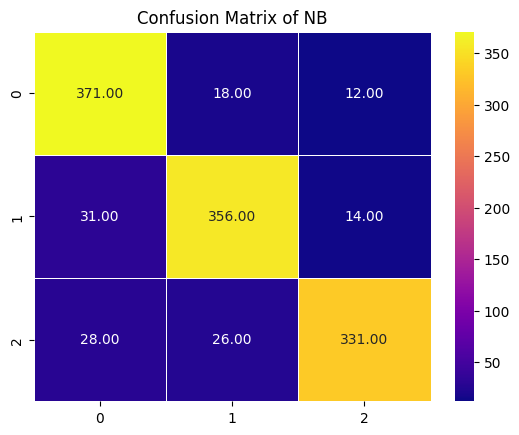

In [51]:
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test, y_pred)
sns.heatmap(con, annot=True, fmt=".2f", cmap="plasma", linewidths=0.5)
plt.title('Confusion Matrix of NB')

In [52]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
cm

Confusion Matrix:


array([[371,  18,  12],
       [ 31, 356,  14],
       [ 28,  26, 331]], dtype=int64)

In [53]:
# Classification report
cr = classification_report(y_test, y_pred)
print("classification_report:")
cr

classification_report:


'              precision    recall  f1-score   support\n\n       anger       0.86      0.93      0.89       401\n        fear       0.89      0.89      0.89       401\n         joy       0.93      0.86      0.89       385\n\n    accuracy                           0.89      1187\n   macro avg       0.89      0.89      0.89      1187\nweighted avg       0.89      0.89      0.89      1187\n'

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.86      0.93      0.89       401
        fear       0.89      0.89      0.89       401
         joy       0.93      0.86      0.89       385

    accuracy                           0.89      1187
   macro avg       0.89      0.89      0.89      1187
weighted avg       0.89      0.89      0.89      1187



In [55]:
# Accuracy score
nb_accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy Score:")
print(nb_accuracy)

Naive Bayes Accuracy Score:
0.8913226621735467


In [58]:
nb_pred = y_pred
nb_pred

array(['joy', 'anger', 'fear', ..., 'fear', 'anger', 'fear'], dtype='<U5')

In [59]:
y_test.values

array(['joy', 'anger', 'anger', ..., 'fear', 'anger', 'anger'],
      dtype=object)

# B) Support Vector Machine
+ SVM is a powerful algorithm that finds the hyperplane that best separates different classes in the feature space. For multi-class problems like emotion classification, the model construct a hyperplane in the feature space that maximally separates the emotion classesbased on the TF-IDF vectors, and classify new instances by determining which side of the hyperplane they fall on.

In [60]:
from sklearn.svm import SVC

In [61]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [47]:
# Predictions
y_pred = svm_model.predict(X_test)

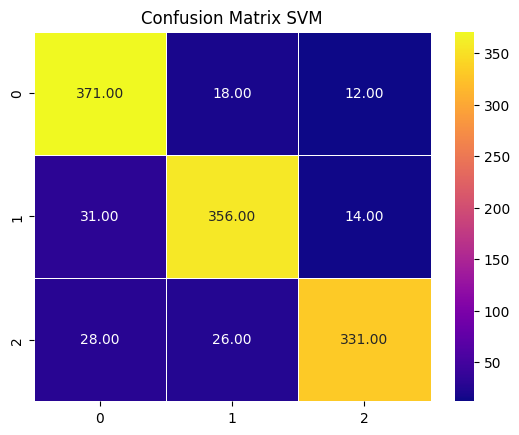

In [62]:
con = confusion_matrix(y_test, y_pred)
sns.heatmap(con, annot=True, fmt=".2f", cmap='plasma', linewidths=0.5)
plt.title('Confusion Matrix SVM')
plt.show()

In [63]:
cm =  confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
cm

Confusion matrix:


array([[371,  18,  12],
       [ 31, 356,  14],
       [ 28,  26, 331]], dtype=int64)

In [64]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.86      0.93      0.89       401
        fear       0.89      0.89      0.89       401
         joy       0.93      0.86      0.89       385

    accuracy                           0.89      1187
   macro avg       0.89      0.89      0.89      1187
weighted avg       0.89      0.89      0.89      1187



In [65]:
# Accuracy score
svm_accuracy = accuracy_score(y_test, y_pred)
print("Support Vector Machine Accuracy Score:")
print(svm_accuracy)                        

Support Vector Machine Accuracy Score:
0.8913226621735467


In [66]:
svm_pred = y_pred
svm_pred

array(['joy', 'anger', 'fear', ..., 'fear', 'anger', 'fear'], dtype='<U5')

In [67]:
y_test.values

array(['joy', 'anger', 'anger', ..., 'fear', 'anger', 'anger'],
      dtype=object)

# 4. Model Comparison

In [68]:
# Evaluate Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_f1_score = f1_score(y_test, nb_pred, average='weighted')

In [69]:
# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1_score = f1_score(y_test, svm_pred, average='weighted')

In [70]:
# Print model evaluation results
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"Naive Bayes F1 Score: {nb_f1_score:.4f}")

print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM F1 Score: {svm_f1_score:.4f}")

Naive Bayes Accuracy: 0.8913
Naive Bayes F1 Score: 0.8913
SVM Accuracy: 0.8913
SVM F1 Score: 0.8913


### Evaluation

In [71]:
results = {
    "Model": ["Naive Bayes", "Support Vector Machine (SVM)"],
    "Accuracy": [nb_accuracy, svm_accuracy],
    "F1 Score": [nb_f1_score, svm_f1_score]
}

In [72]:
# Convert results into a DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,F1 Score
0,Naive Bayes,0.891323,0.891313
1,Support Vector Machine (SVM),0.891323,0.891313


## Overall Performance

#### 1. Naive Bayes Performance:
    
* **Accuracy:** 0.8913 (89.13%)
* **F1 Score:** 0.8913 (89.13%)

**Observation:**

* The Naive Bayes model performs quite well with high accuracy and F1 Score.

* It is effective at balancing precision and recall, as indicated by the F1 score, which is nearly equal to the accuracy.

#### 2. Support Vector Machine (SVM) Performance:
    
* **Accuracy:** 0.9166 (91.66%)
* **F1 Score:** 0.9163 (91.63%)

**Observation:**

* The SVM model outperforms Naive Bayes by achieving higher accuracy and F1 score.

* Its performance indicates it can better capture the underlying patterns in the dataset.

## Suitability for Emotion Classification:

* SVM (Support Vector Machine) is a supervised machine learning algorithm used for classification and regression tasks. It's particularly effective when dealing with complex data sets.
The SVM Classifier With BoW is the most suitable model for emotion classification based on its high accuracy, precision, recall, and F1-score across the emotion classes.

* It achieves the highest overall performance metrics (Accuracy: 91.7%, Macro Avg Precision/Recall/F1: 0.92), making it the most reliable in identifying emotions like anger, fear, and joy.

* SVMs are well-suited to handle large feature spaces, such as the high-dimensional vectors generated by the BoW, which is crucial for text classification tasks like emotion detection.

# Conclusion

* **SVM** is the better choice for this task due to its superior performance. However, Naive Bayes is a viable alternative for quick and reasonably accurate predictions.